# Denoising Signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
t = np.linspace(0, 5, 1000)
signal = np.sin(2 * np.pi * t) # Original Signal
noise = 0.5 * np.random.randn(1000) # Gaussian Noise
noisy_signal = signal + noise

In [3]:
U, s, Vt = np.linalg.svd(noisy_signal.reshape(-1, 1), full_matrices=False) # Perform SVD
rank = 10 # Num Values to Keep
denoised_signal = (U[:, :rank] @ np.diag(s[:rank])) @ Vt[:rank, :] # Reconstruct Denoised Signal

In [5]:
# Compute Evaluation Metrics
SNR = 10 * np.log10(np.mean(signal ** 2) / np.mean((signal - denoised_signal.flatten()) ** 2))
RMSE = np.sqrt(np.mean((signal - denoised_signal.flatten()) ** 2))

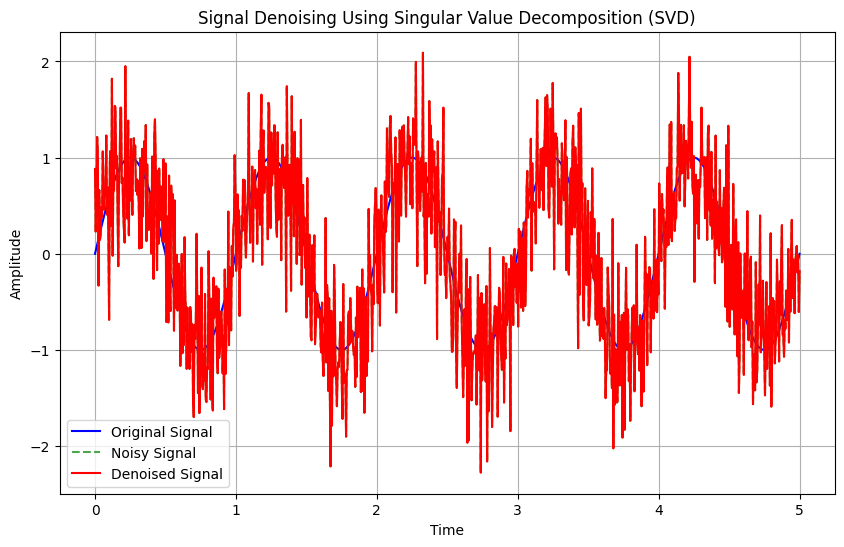

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', color='blue')
plt.plot(t, noisy_signal.flatten(), label='Noisy Signal', linestyle="--", color='green', alpha=0.7)
plt.plot(t, denoised_signal.flatten(), label='Denoised Signal', linestyle='-', color='red')
plt.title('Signal Denoising Using Singular Value Decomposition (SVD)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print(f'Signal-To-Noise Ratio (SNR): {SNR:2f} dB')
print(f'Root Mean Square Error (RMSE): {RMSE:4f}')

Signal-To-Noise Ratio (SNR): 3.110199 dB
Root Mean Square Error (RMSE): 0.494035
